# Quality of Wine Prediction

### Background
    In the field of viticulture and oenology, wine quality is a critical factor in determining market value and customer happiness. Winemakers are continuously looking for ways to improve and preserve the quality of their goods. To this purpose, predictive modeling may be used to forecast wine quality based on physicochemical and sensory characteristics.

### Objective
    The objective is to build a machine learning model capable of accurately predicting the quality of wine based on its attributes. This model can assist winemakers in assessing the quality of their products and making informed decisions regarding production and refinement processes.

In [1]:
# Importing the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
wine = pd.read_csv('WineQuality.csv')
wine.head()

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        2732            7.4             0.170         0.29             1.4   
1        2607            5.3             0.310         0.38            10.5   
2        1653            4.7             0.145         0.29             1.0   
3        3264            6.9             0.260         0.29             4.2   
4        4931            6.4             0.450         0.07             1.1   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.047                 23.0                 107.0  0.99390  3.52   
1      0.031                 53.0                 140.0  0.99321  3.34   
2      0.042                 35.0                  90.0  0.99080  3.76   
3      0.043                 33.0                 114.0  0.99020  3.16   
4      0.030                 10.0                 131.0  0.99050  2.97   

   sulphates  alcohol  quality        Type  
0       0.65     10.4        6  White Wine  
1       0.46     11.7        6  White Wine  
2       0.49     11.3        6  White Wine  
3       0.31     12.5        6  White Wine  
4       0.28     10.8        5  White Wine

In [3]:
# Displaying the shape of the dataset
wine.shape

(32485, 14)

In [4]:
# Dropped unnecessary columns
wine = wine.drop(wine.columns[0], axis=1)
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.170         0.29             1.4      0.047   
1            5.3             0.310         0.38            10.5      0.031   
2            4.7             0.145         0.29             1.0      0.042   
3            6.9             0.260         0.29             4.2      0.043   
4            6.4             0.450         0.07             1.1      0.030   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 23.0                 107.0  0.99390  3.52       0.65   
1                 53.0                 140.0  0.99321  3.34       0.46   
2                 35.0                  90.0  0.99080  3.76       0.49   
3                 33.0                 114.0  0.99020  3.16       0.31   
4                 10.0                 131.0  0.99050  2.97       0.28   

   alcohol  quality        Type  
0     10.4        6  White Wine  
1     11.7        6  White Wine  
2     11.3        6  White Wine  
3     12.5        6  White Wine  
4     10.8        5  White Wine

In [5]:
# Converting categorical columns into numerical columns

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
wine['Type'] = enc.fit_transform(wine['Type'])
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.170         0.29             1.4      0.047   
1            5.3             0.310         0.38            10.5      0.031   
2            4.7             0.145         0.29             1.0      0.042   
3            6.9             0.260         0.29             4.2      0.043   
4            6.4             0.450         0.07             1.1      0.030   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 23.0                 107.0  0.99390  3.52       0.65   
1                 53.0                 140.0  0.99321  3.34       0.46   
2                 35.0                  90.0  0.99080  3.76       0.49   
3                 33.0                 114.0  0.99020  3.16       0.31   
4                 10.0                 131.0  0.99050  2.97       0.28   

   alcohol  quality  Type  
0     10.4        6     1  
1     11.7        6     1  
2     11.3        6     1  
3     12.5        6     1  
4     10.8        5     1

- In the type column the value 1 indicates **White Wine** and 0 indicates **Red Wine**

In [6]:
# Checked if there are any null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

- The output indicates that there are no missing (null) values in any of the columns of the dataset. Each column has a count of 0 null values, meaning that all entries in the dataset have valid values for all features. This suggests that the dataset is complete and does not require any imputation or handling of missing data.

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         32485 non-null  float64
 1   volatile acidity      32485 non-null  float64
 2   citric acid           32485 non-null  float64
 3   residual sugar        32485 non-null  float64
 4   chlorides             32485 non-null  float64
 5   free sulfur dioxide   32485 non-null  float64
 6   total sulfur dioxide  32485 non-null  float64
 7   density               32485 non-null  float64
 8   pH                    32485 non-null  float64
 9   sulphates             32485 non-null  float64
 10  alcohol               32485 non-null  float64
 11  quality               32485 non-null  int64  
 12  Type                  32485 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 3.2 MB


In [8]:
wine.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   32485.000000      32485.000000  32485.000000    32485.000000   
mean        7.214736          0.340122      0.318324        5.438696   
std         1.308216          0.164912      0.145152        4.799221   
min         3.800000          0.080000      0.000000        0.600000   
25%         6.400000          0.230000      0.250000        1.800000   
50%         7.000000          0.290000      0.310000        3.000000   
75%         7.700000          0.410000      0.390000        8.100000   
max        15.900000          1.580000      1.660000       65.800000   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  32485.000000         32485.000000          32485.000000  32485.000000   
mean       0.056009            30.458258            115.656303      0.994719   
std        0.034503            17.608076             56.456074      0.003015   
min        0.009000             1.000000              6.000000      0.987110   
25%        0.038000            17.000000             77.000000      0.992400   
50%        0.047000            29.000000            118.000000      0.994900   
75%        0.065000            41.000000            156.000000      0.997000   
max        0.611000           289.000000            440.000000      1.038980   

                 pH     sulphates       alcohol       quality          Type  
count  32485.000000  32485.000000  32485.000000  32485.000000  32485.000000  
mean       3.219089      0.531500     10.480694      5.811698      0.752747  
std        0.161441      0.148712      1.190661      0.872474      0.431421  
min        2.720000      0.220000      8.000000      3.000000      0.000000  
25%        3.110000      0.430000      9.500000      5.000000      1.000000  
50%        3.210000      0.510000     10.300000      6.000000      1.000000  
75%        3.320000      0.600000     11.300000      6.000000      1.000000  
max        4.010000      2.000000     14.900000      9.000000      1.000000

Summary statistics table of various features related to wine quality.

- **Fixed Acidity:** The average fixed acidity of the wine samples is approximately 7.21, with a standard deviation of 1.31. The minimum and maximum values are 3.8 and 15.9, respectively.

- **Volatile Acidity:** The average volatile acidity is around 0.34, with a standard deviation of 0.16. The values range from 0.08 to 1.58.

- **Citric Acid:** The mean citric acid content is approximately 0.32, with a standard deviation of 0.15. The minimum value is 0, and the maximum value is 1.66.

- **Residual Sugar:** The average residual sugar content is about 5.44, with a standard deviation of 4.80. The values range from 0.6 to 65.8.

- **Chlorides:** The mean chloride concentration is approximately 0.056, with a standard deviation of 0.035. The minimum and maximum values are 0.009 and 0.611, respectively.

- **Free Sulfur Dioxide:** The average free sulfur dioxide content is around 30.46, with a standard deviation of 17.61. Values range from 1 to 289.

- **Total Sulfur Dioxide:** The mean total sulfur dioxide content is about 115.66, with a standard deviation of 56.46. The values range from 6 to 440.

- **Density:** The average density of the wine samples is approximately 0.995, with a standard deviation of 0.003. The density ranges from 0.987 to 1.039.

- **pH:** The mean pH level is around 3.22, with a standard deviation of 0.16. The values range from 2.72 to 4.01.

- **Sulphates:** The average sulphate concentration is about 0.53, with a standard deviation of 0.15. The minimum and maximum values are 0.22 and 2.0, respectively.

- **Alcohol:** The mean alcohol content is approximately 10.48%, with a standard deviation of 1.19. Values range from 8 to 14.9.

- **Quality:** The quality score of the wine samples has a mean of around 5.81, with a standard deviation of 0.87. The values range from 3 to 9.

- **Type:** This column indicates the type of wine, with 1(White wine) representing one type and 0(Red wine) representing another type. The majority of the samples seem to belong to type 1, as indicated by the mean value being close to 1.

## Exploratory data analysis (EDA)

<Axes: >

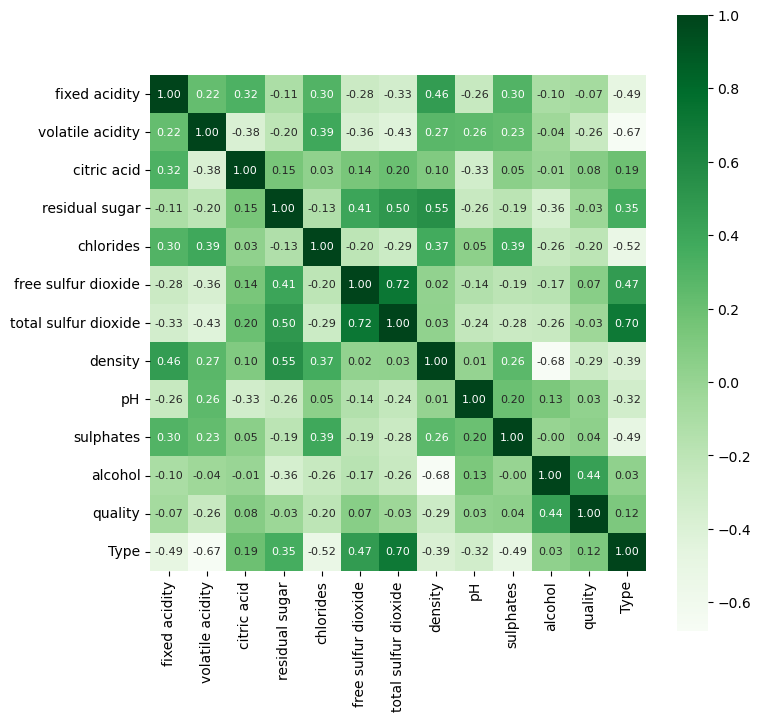

In [10]:
correlation = wine.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'Greens')

- From the above covariance matrix it is observed no two independent variables are highly corealted with eachother as all the co realtional values are less than 0.75 

- This shows there is no sign of multicollinearity, with this we can move forward without eliminating any columns. 

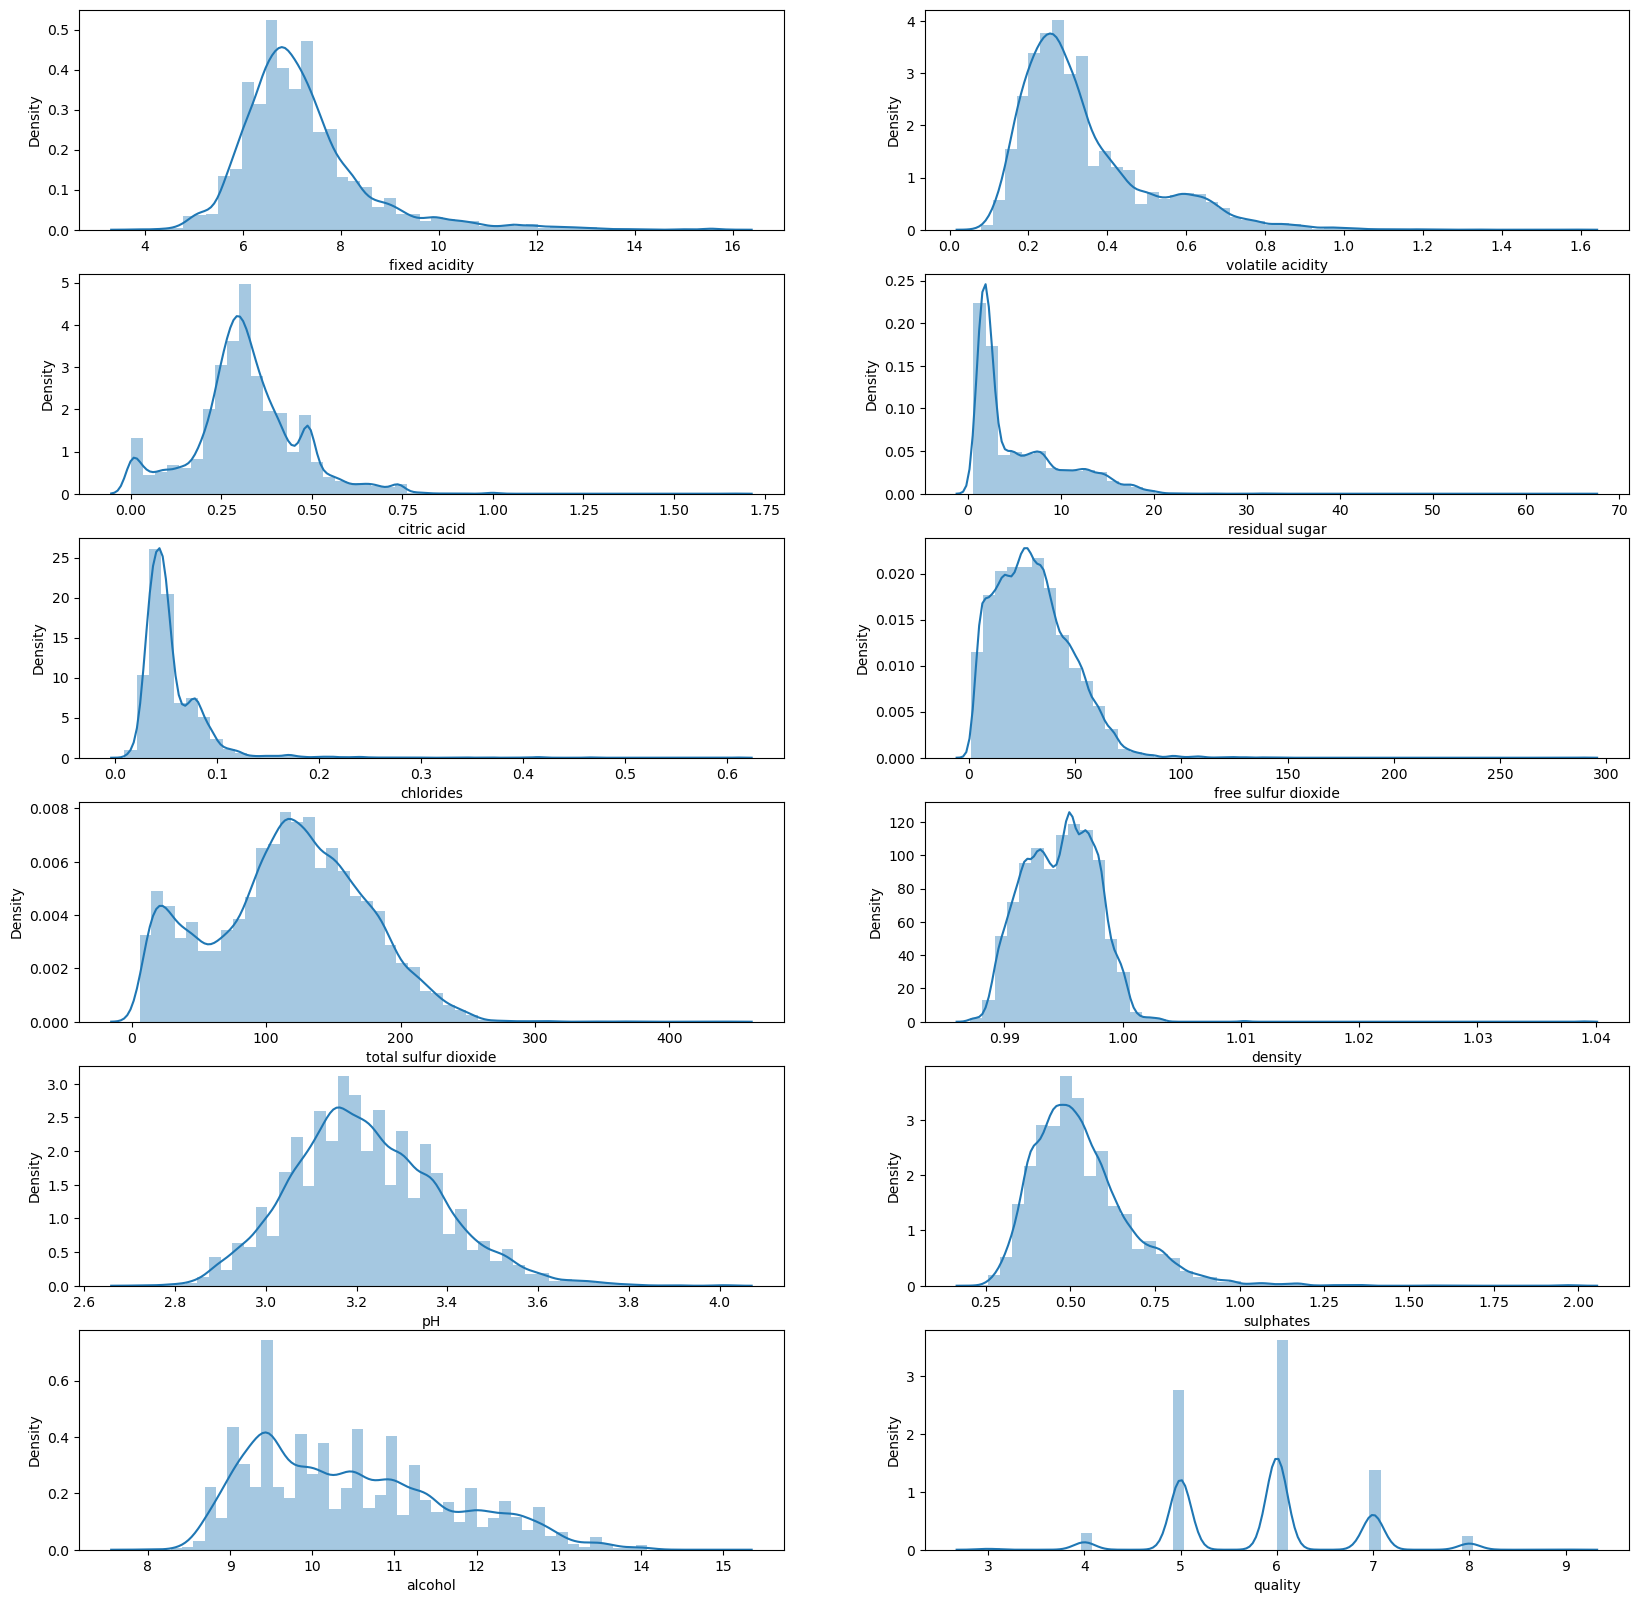

In [11]:
figure, ax = plt.subplots(nrows = 6, ncols = 2)    
ax = ax.flatten()         
figure.set_size_inches(20,20)

for ax, col in zip(ax, wine.columns):
  sns.distplot(wine[col], ax = ax)

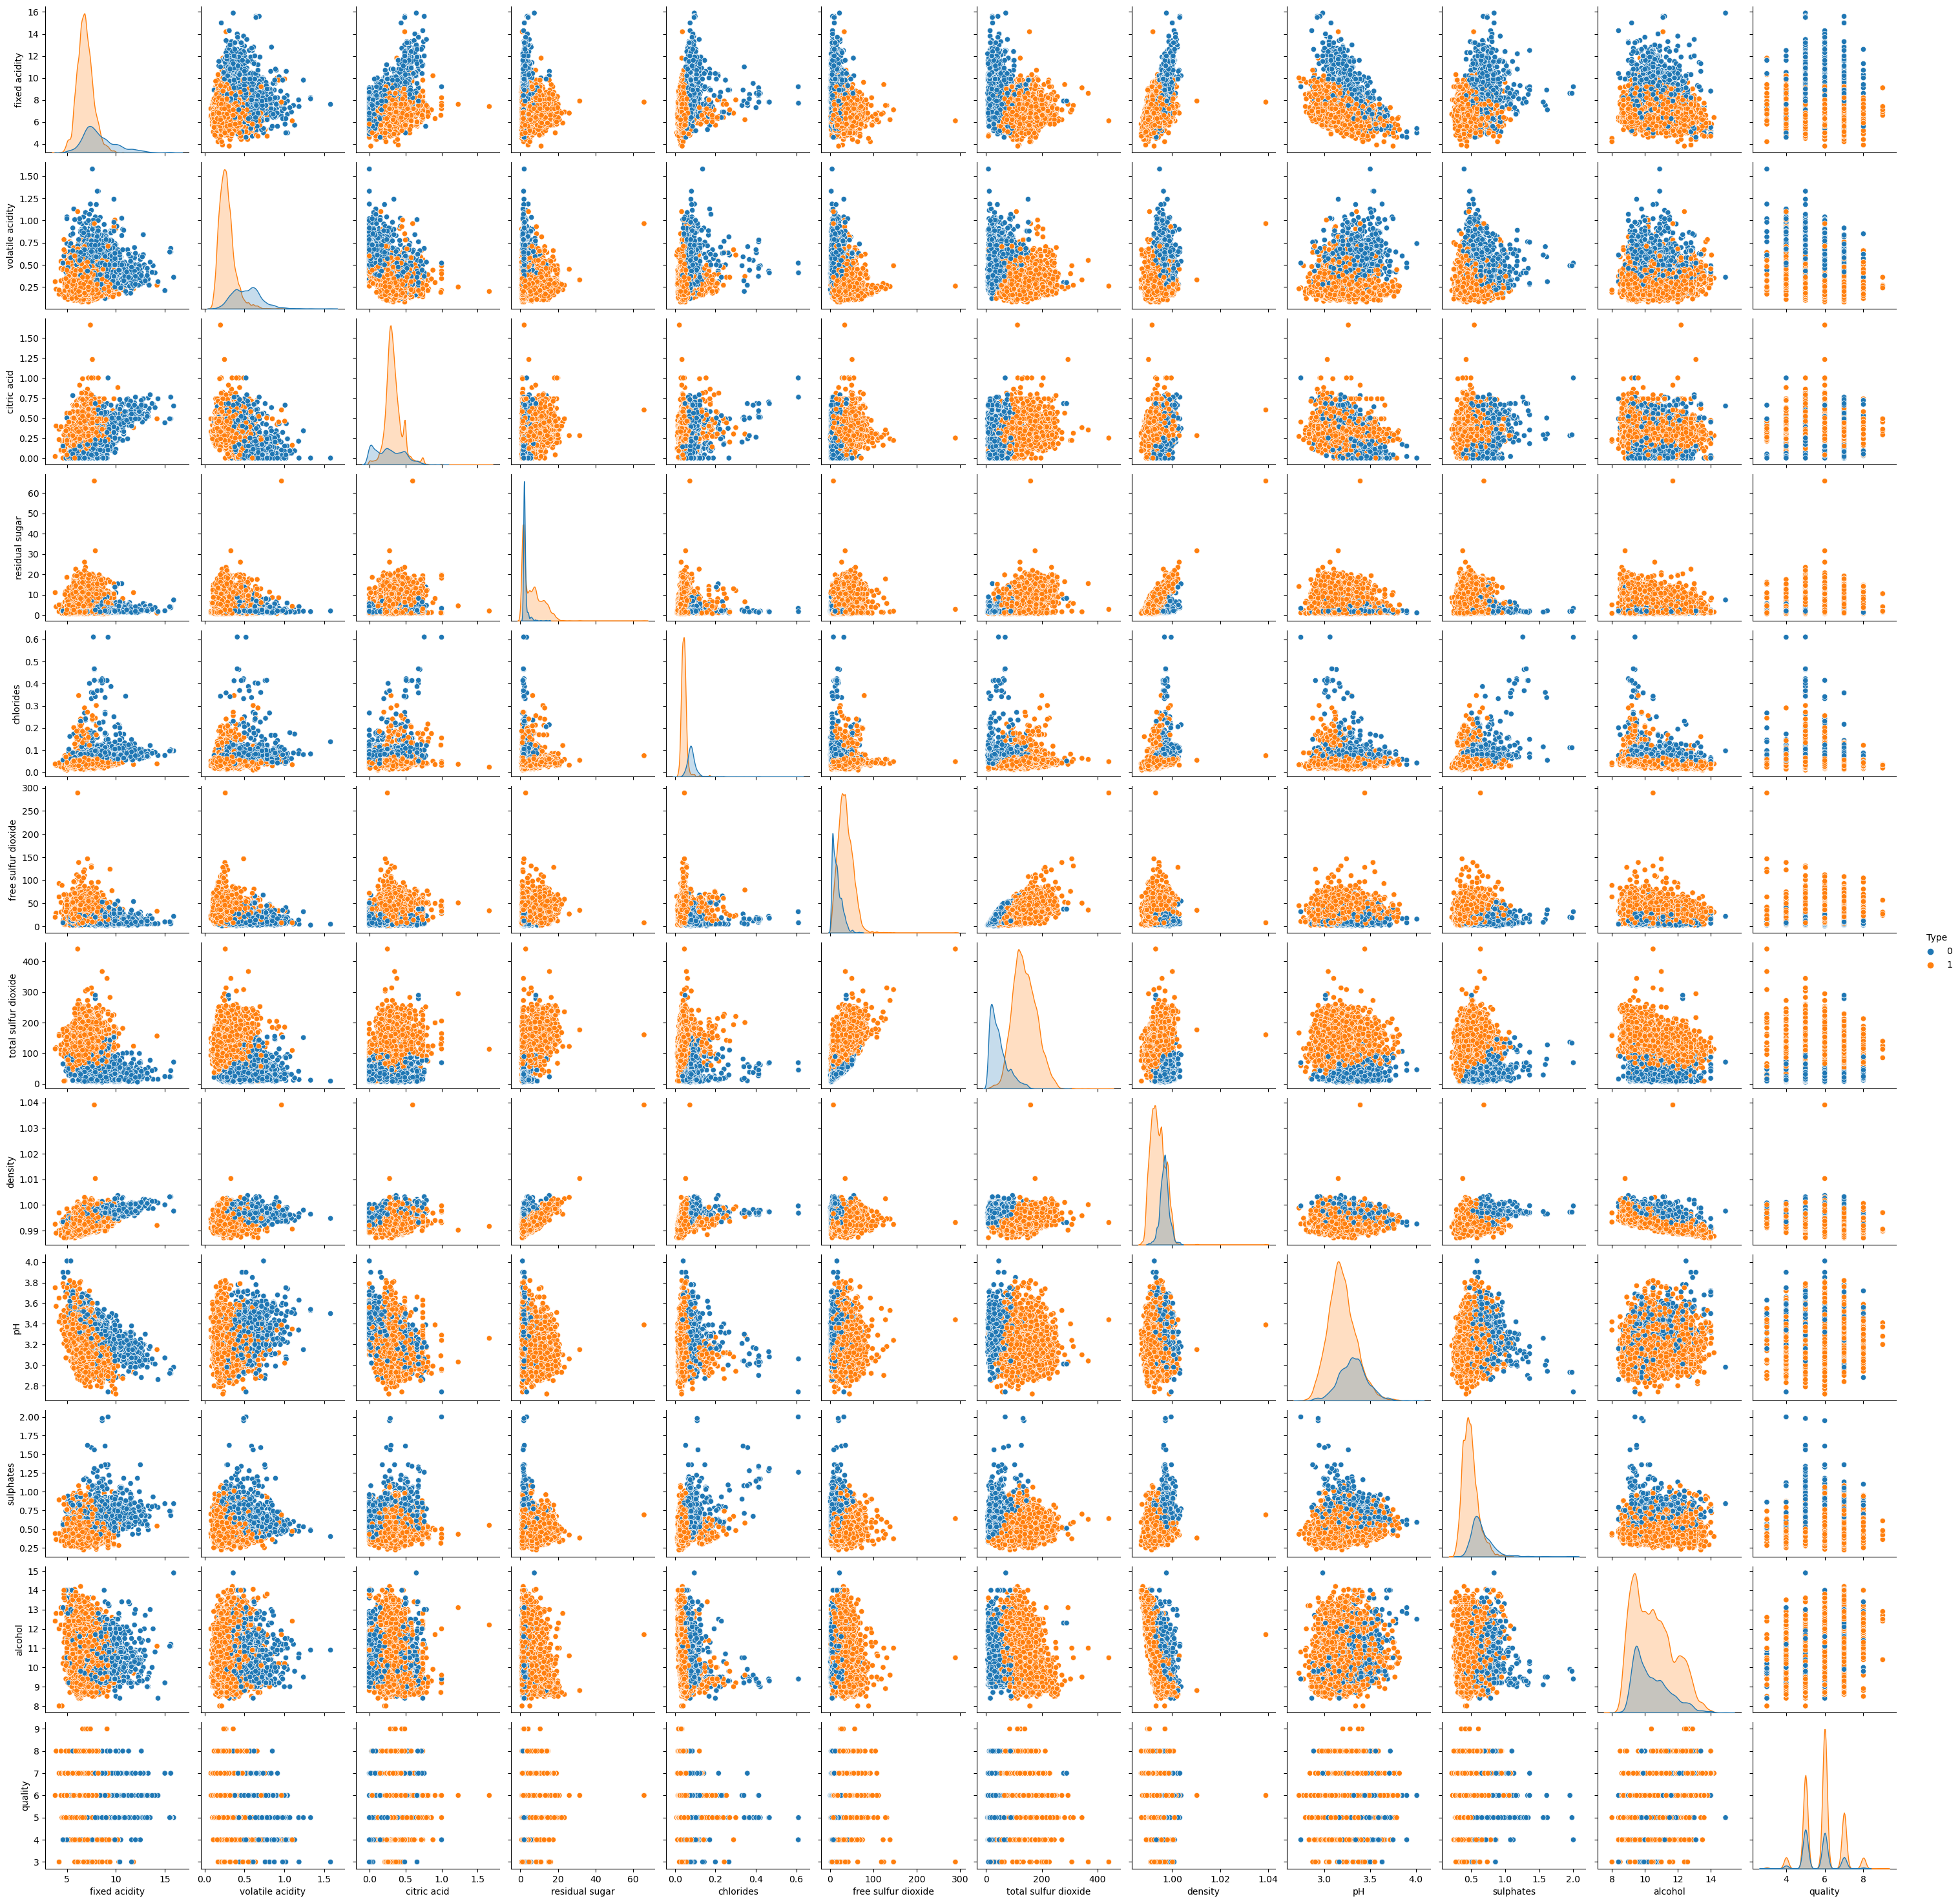

In [12]:
sns.pairplot(wine,hue='Type')

- 1 indicates white wine

- 0 indicates red wine

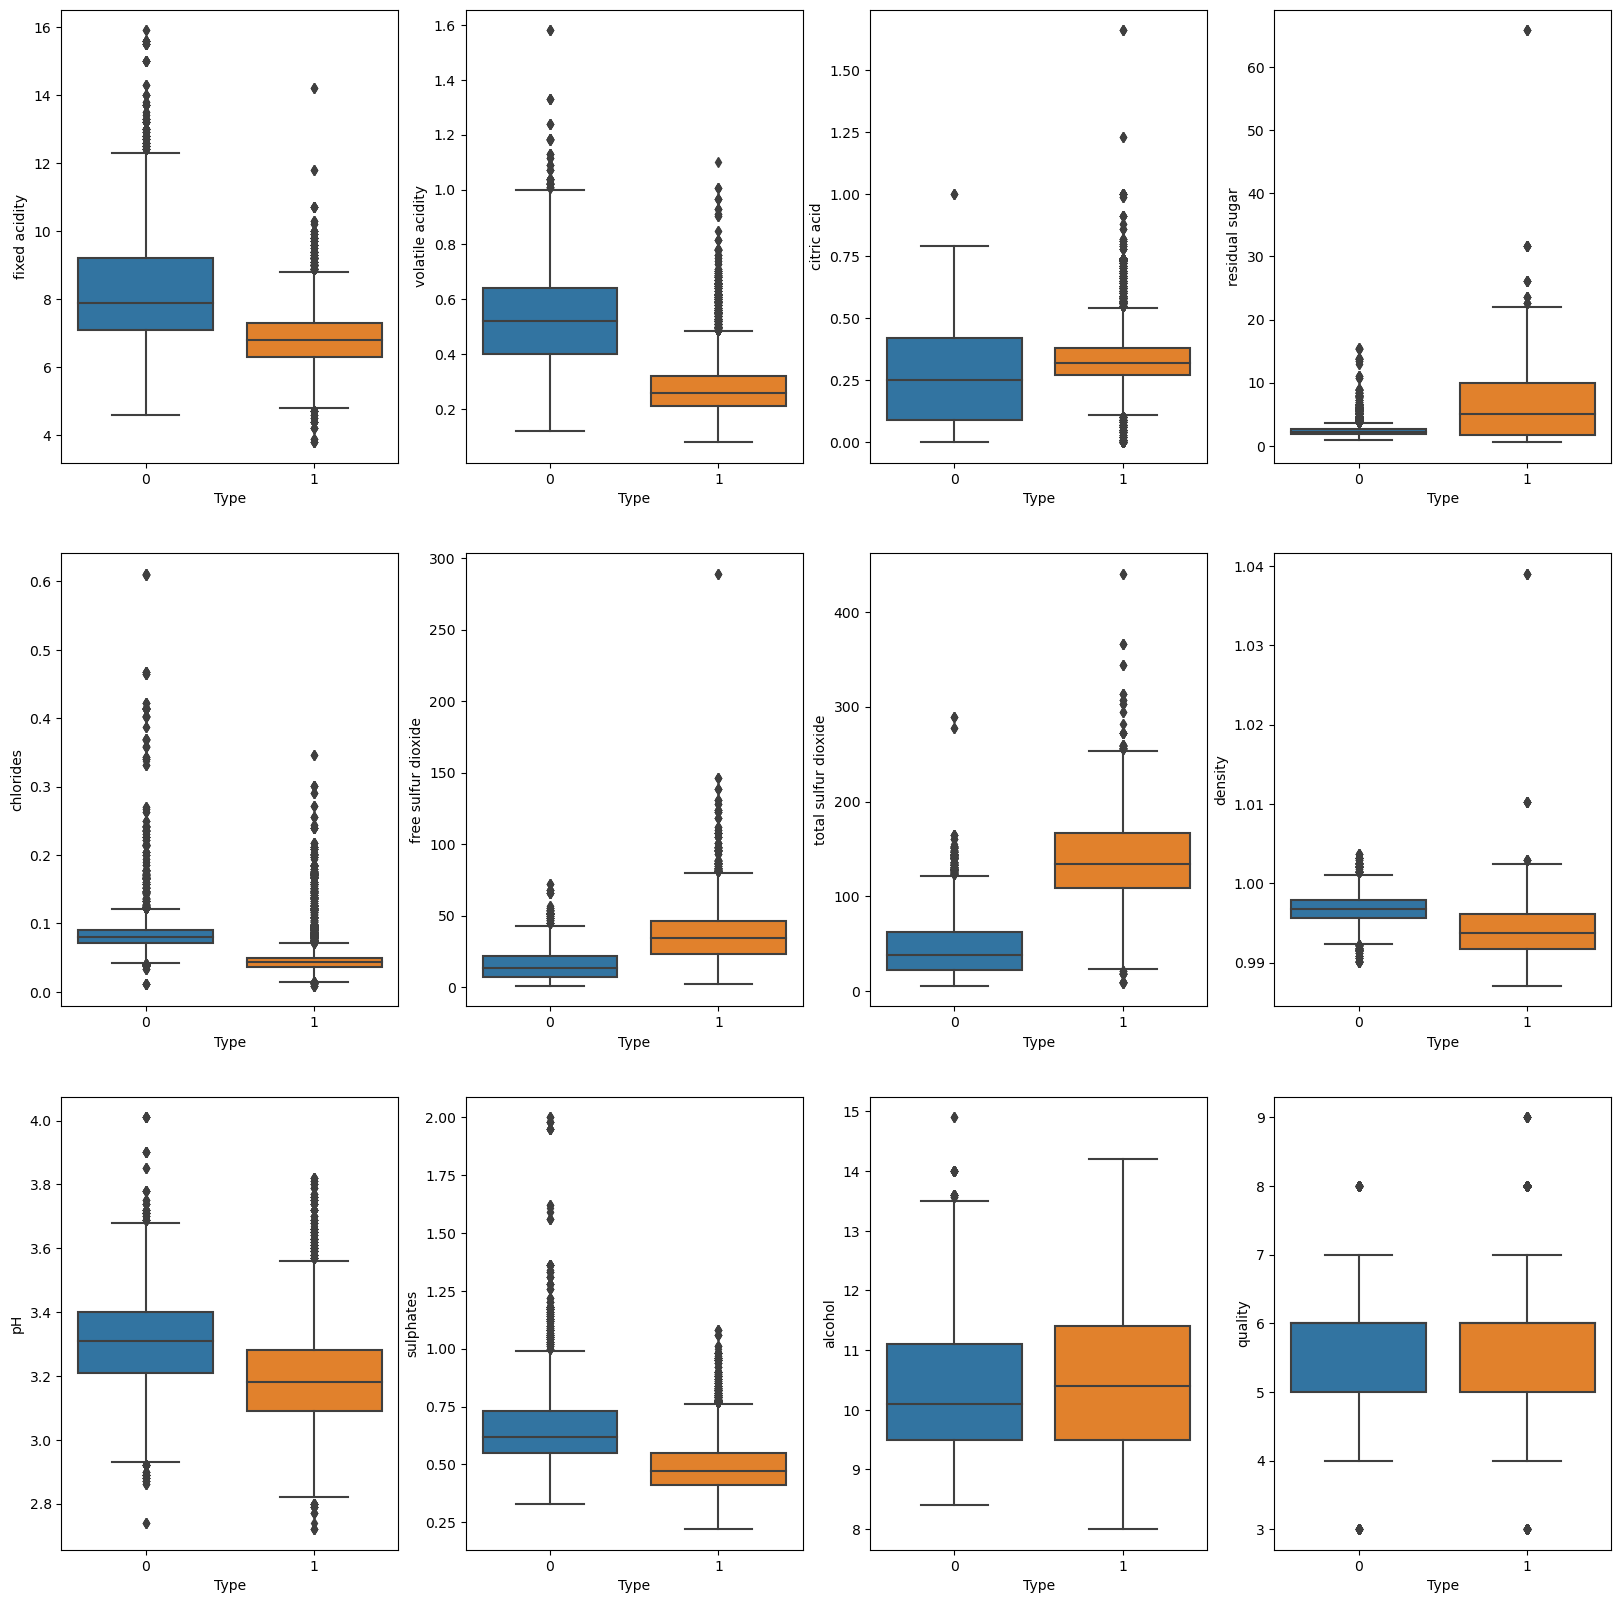

In [13]:
fig, axes = plt.subplots(nrows = 3, ncols = 4)
axes = axes.flatten()
fig.set_size_inches(20,20)

for ax, col in zip(axes, wine.columns):
  sns.boxplot(x='Type',y=wine[col], ax = ax , data=wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

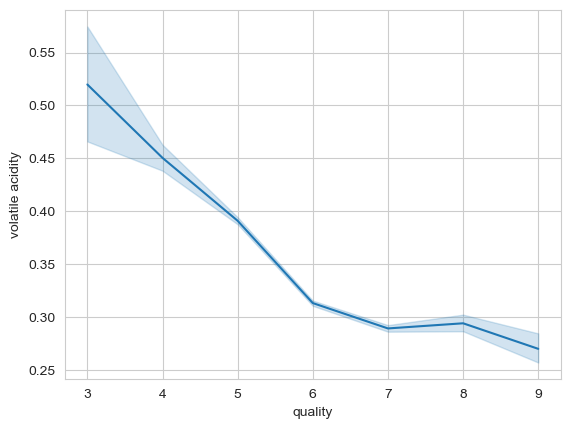

In [132]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'volatile acidity', data = wine)

As the quality score increases volatile acidity composition decreases.

<Axes: xlabel='quality', ylabel='citric acid'>

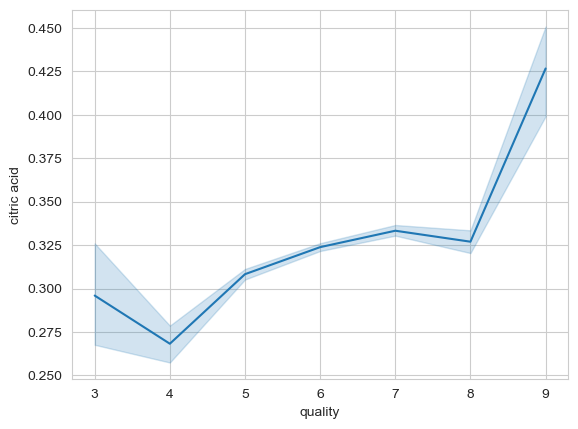

In [134]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'citric acid', data = wine)

- No Specfic relation is identified

<Axes: xlabel='quality', ylabel='chlorides'>

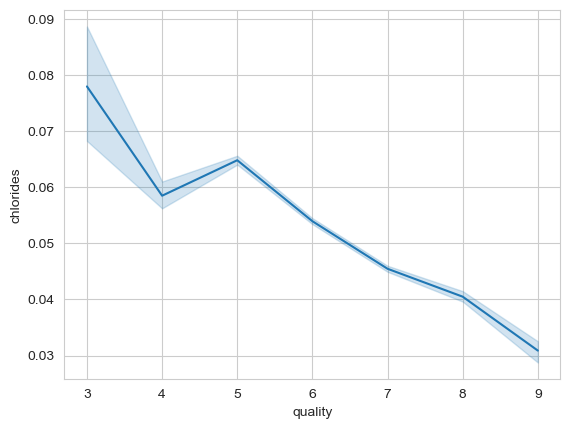

In [136]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'chlorides', data = wine)

- Composition of chloride also go down as we go higher in the quality of the wine.

<Axes: xlabel='quality', ylabel='sulphates'>

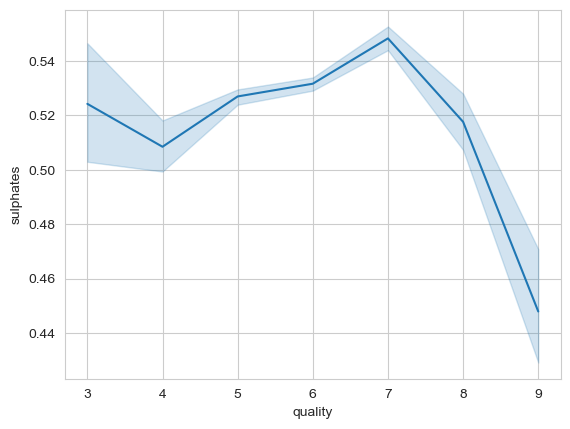

In [137]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'sulphates', data = wine)


- No Specfic relation is identified

<Axes: xlabel='quality', ylabel='alcohol'>

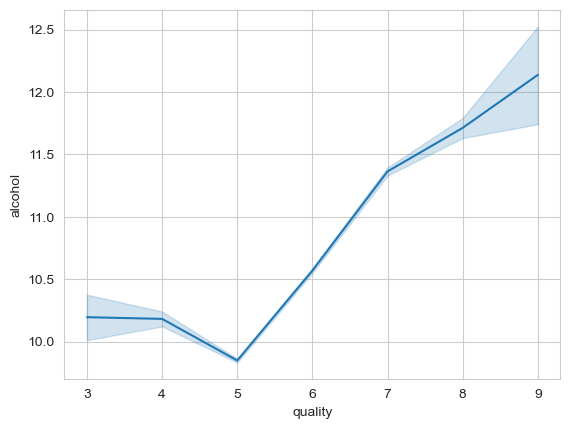

In [140]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'alcohol', data = wine)

- The quality of the wine increases as alcohol concentration increases

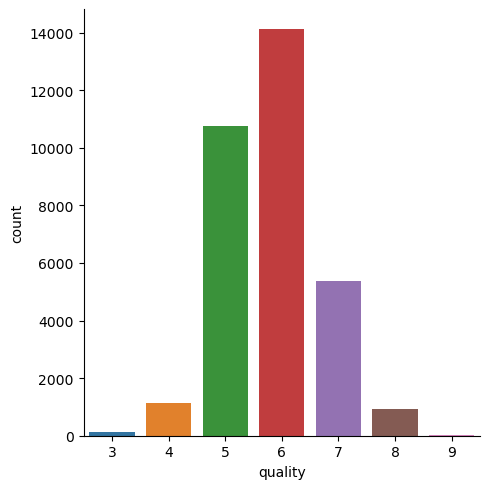

In [9]:
sns.catplot(x='quality', data = wine, kind = 'count')


- The output shows the distribution of wine quality ratings in the dataset. Each quality rating (ranging from 3 to 9) has a corresponding count of how many instances in the dataset have that rating.

- In this case, it's evident that the dataset is imbalanced, meaning that some quality ratings are much more prevalent than others. For example:

- Quality ratings of 5 and 6 are the most common, with 10,755 and 14,117 instances, respectively.

- Quality ratings of 3, 4, 8, and 9 are relatively rare, with counts ranging from 24 to 1,144 instances.

- Imbalanced data can pose challenges for machine learning models, especially for classification tasks, as they might become biased towards the majority class.

In [14]:
# Created a column that indicates the best wine with 1 and the rest with 0
wine['best quality'] = [1 if x > 5 else 0 for x in wine.quality]
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.170         0.29             1.4      0.047   
1            5.3             0.310         0.38            10.5      0.031   
2            4.7             0.145         0.29             1.0      0.042   
3            6.9             0.260         0.29             4.2      0.043   
4            6.4             0.450         0.07             1.1      0.030   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 23.0                 107.0  0.99390  3.52       0.65   
1                 53.0                 140.0  0.99321  3.34       0.46   
2                 35.0                  90.0  0.99080  3.76       0.49   
3                 33.0                 114.0  0.99020  3.16       0.31   
4                 10.0                 131.0  0.99050  2.97       0.28   

   alcohol  quality  Type  best quality  
0     10.4        6     1             1  
1     11.7        6     1             1  
2     11.3        6     1             1  
3     12.5        6     1             1  
4     10.8        5     1             0

- As the dataset is imbalanced, I took this step to set a threshold value to 5. If the quality wine is greater than 5, then quality of wine is determined as good else it is considered to be poor quality wine.

- If the value in the Best quality column is 1, it indicates the wine quality is good.

- If the value in the Best quality column is 0, it indicates the wine quality is poor.

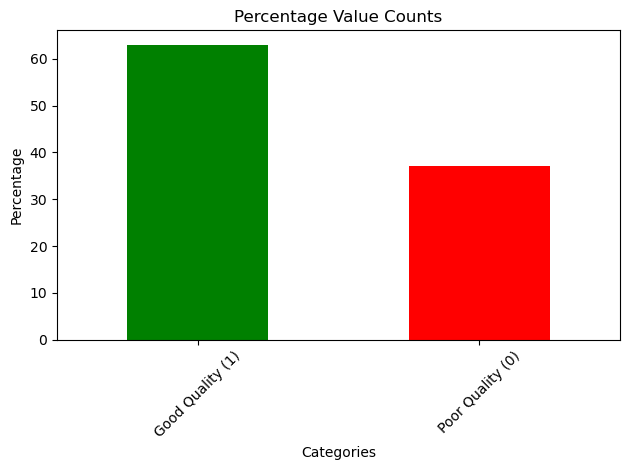

In [92]:
percentages = (wine['best quality'].value_counts() / sum(wine['best quality'].value_counts())) * 100
percentages.plot(kind='bar', color=['Green', 'red'])
plt.title('Percentage Value Counts')
plt.xlabel('Categories')
plt.ylabel('Percentage')

# Set custom x-labels
plt.xticks(range(len(percentages.index)), ['Good Quality (1)', 'Poor Quality (0)'], rotation=45)
plt.tight_layout()
plt.show()

- "Good quality": 62.96%

- "Poor quality": 37.04%

- While it's clear that the dataset is not perfectly balanced (i.e., the proportions are not exactly 50/50).

- In many cases, a slight imbalance like this may not significantly impact the analysis, particularly if the class imbalance is not severe and the chosen machine learning algorithms can handle it effectively. 

# Model Building

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X=wine.drop(['quality','best quality'],axis=1)
y=wine['best quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)



## 1 .Logistic Regression

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold

# Define the pipeline
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

# Define the parameter grid for GridSearchCV
lr_param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'logistic__penalty': ['l1', 'l2']  # Penalty type
}

# Create KFold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV with k-fold cross-validation
lr_grid_search = GridSearchCV(logistic_pipeline, lr_param_grid, cv=kfold)
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logistic__penalty': ['l1', 'l2']})

In [111]:
# Get the best parameters
lr_best_params = lr_grid_search.best_params_

# Print the best parameters
print("Logistic Regression Best Parameters:", lr_best_params)


Logistic Regression Best Parameters: {'logistic__C': 0.1, 'logistic__penalty': 'l2'}


In [112]:
lr_best_model = lr_grid_search.best_estimator_

# Evaluate the model on the test set
test_score = lr_best_model.score(X_test, y_test)
print("Test Accuracy:", test_score)

Test Accuracy: 0.7429714754771188


In [113]:
from sklearn.metrics import classification_report

# Predictions on train set
y_pred_train = lr_best_model.predict(X_train)

# Classification Report
print("Classification Report on training data:")
print(classification_report(y_train, y_pred_train))


# Predictions on test set
y_pred_test = lr_best_model.predict(X_test)

# Classification Report
print("Classification Report on testing data: ")
print(classification_report(y_test, y_pred_test))

Classification Report on training data:
              precision    recall  f1-score   support

           0       0.68      0.56      0.61      8422
           1       0.76      0.85      0.80     14317

    accuracy                           0.74     22739
   macro avg       0.72      0.70      0.71     22739
weighted avg       0.73      0.74      0.73     22739

Classification Report on testing data: 
              precision    recall  f1-score   support

           0       0.69      0.57      0.62      3610
           1       0.77      0.85      0.81      6136

    accuracy                           0.74      9746
   macro avg       0.73      0.71      0.71      9746
weighted avg       0.74      0.74      0.74      9746



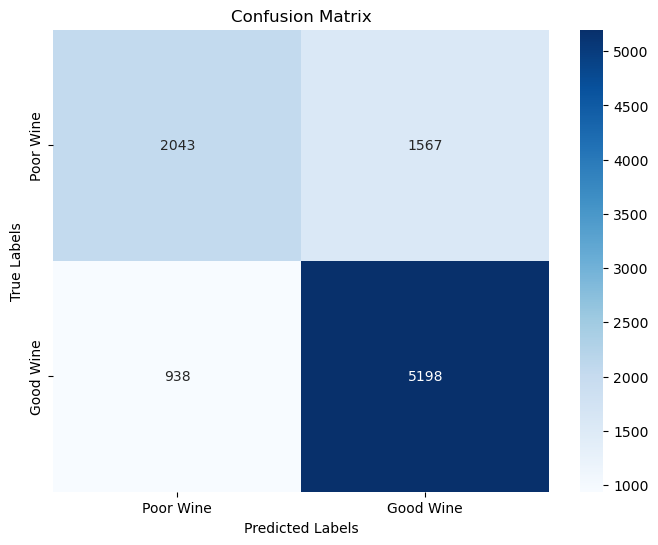

In [115]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Poor Wine', 'Good Wine'], 
            yticklabels=['Poor Wine', 'Good Wine'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

- **True Positives (TP):** 5198

    These are instances where the model correctly predicted the positive class. In this case, it correctly identified 5198 instances as "positive" or "good quality" wine.

- **False Positives (FP):** 1567

    These are instances where the model incorrectly predicted the positive class when the actual class was negative. In other words, the model predicted 1567 instances as "positive" or "good quality" wine when they were actually "negative" or "poor quality" wine.

- **True Negatives (TN):** 2043

    These are instances where the model correctly predicted the negative class. It correctly identified 2043 instances as "negative" or "poor quality" wine.

- **False Negatives (FN):** 938

    These are instances where the model incorrectly predicted the negative class when the actual class was positive. In other words, the model predicted 938 instances as "negative" or "poor quality" wine when they were actually "positive" or "good quality" wine.

In summary, while the model demonstrates some effectiveness in identifying instances of "positive" or "good quality" wine, there is room for improvement, particularly in reducing false positives and false negatives.



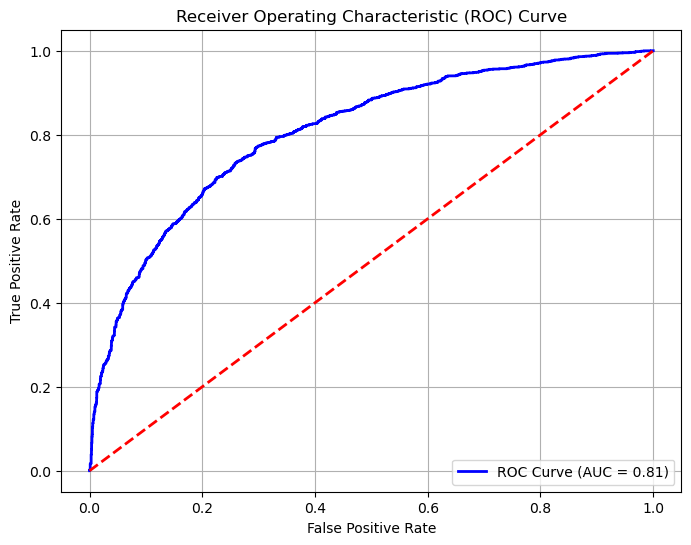

In [118]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba = lr_grid_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


- In summary, an AUC score of 0.81 suggests that the model has some predictive capability, but further optimization or adjustments may be necessary to enhance its performance, especially aming at higher accuracy.

## 2. XGBClassifier

In [106]:
from xgboost import XGBClassifier

# Define the pipeline
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgboost', XGBClassifier())
])

# Define the parameter grid for GridSearchCV
xgb_param_grid = {
    'xgboost__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevents overfitting
    'xgboost__max_depth': [3, 5, 7],  # Maximum depth of the tree
    'xgboost__n_estimators': [10,20,30],  # Number of boosting rounds
    'xgboost__gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node
}

# Create KFold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV with k-fold cross-validation
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=kfold)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters
xgb_best_params = xgb_grid_search.best_params_
print("Best Parameters:", xgb_best_params)

# Get the best estimator
xgb_best_model = xgb_grid_search.best_estimator_
# Evaluate the model on the test set
test_score = xgb_best_model.score(X_test, y_test)
print("Test Accuracy:", test_score)

y_pred_train = xgb_best_model.predict(X_train)

# Classification Report
print("Classification Report on training data:")
print(classification_report(y_train, y_pred_train))

# Predictions on test set
y_pred_test = xgb_best_model.predict(X_test)

# Classification Report
print("Classification Report on testing data: ")
print(classification_report(y_test, y_pred_test))


Best Parameters: {'xgboost__gamma': 0.2, 'xgboost__learning_rate': 0.2, 'xgboost__max_depth': 7, 'xgboost__n_estimators': 30}
Test Accuracy: 0.9118612764210958
Classification Report on training data:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8422
           1       0.93      0.94      0.94     14317

    accuracy                           0.92     22739
   macro avg       0.92      0.91      0.92     22739
weighted avg       0.92      0.92      0.92     22739

Classification Report on testing data: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3610
           1       0.93      0.93      0.93      6136

    accuracy                           0.91      9746
   macro avg       0.91      0.90      0.91      9746
weighted avg       0.91      0.91      0.91      9746



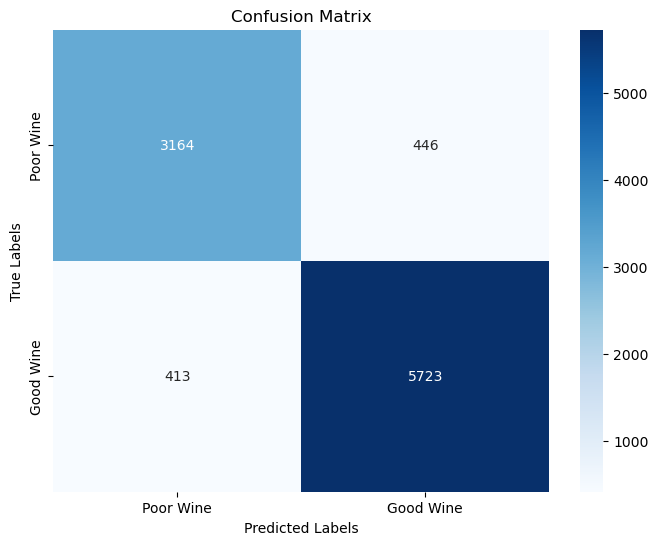

In [107]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Poor Wine', 'Good Wine'], 
            yticklabels=['Poor Wine', 'Good Wine'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

- **True Positives (TP):** 5723

    The model correctly predicted 5723 instances of "Good quality" wine. These are cases where the wine was actually of the good quality, and the model correctly identified it as such.

- **False Positives (FP):** 446

    The model incorrectly predicted 446 instances of "Poor quality" wine as "Good quality" wine. These are cases where the wine was not actually of the good quality, but the model mistakenly classified it as such.

- **True Negatives (TN):** 3164

    The model correctly predicted 3164 instances of "Poor quality" wine. These are cases where the wine was not of the good quality, and the model correctly identified it as such.

- **False Negatives (FN):** 413

    The model incorrectly predicted 413 instances of "Good quality" wine as "Poor quality" wine. These are cases where the wine was actually of the good quality, but the model failed to identify it correctly.

- Interpreting these values in the context of wine quality, we can see that the model has a relatively high number of true positives, indicating that it is effective at identifying wines of the good quality. However, it also has a noticeable number of false positives and false negatives, suggesting that there are areas for improvement in its ability to distinguish between wines of different qualities. Further analysis, model refinement, and possibly the incorporation of additional features could help improve the model's performance in predicting wine quality accurately.

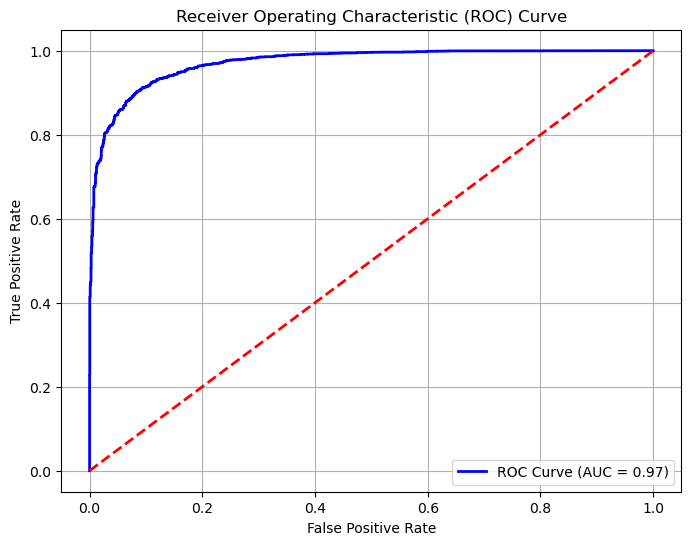

In [108]:
# Get predicted probabilities for the positive class
y_pred_proba = xgb_grid_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- AUC score of 0.9713 implies that the model has a high true positive rate while maintaining a low false positive rate across different threshold settings.
This indicates that the model is performing exceptionally well in correctly classifying instances of both classes and is making very few mistakes in misclassifying instances.

## 3. Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier())
])

# Define the parameter grid for GridSearchCV
rf_param_grid = {
    'random_forest__n_estimators': [5,15,25],  # Number of trees in the forest
    'random_forest__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'random_forest__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'random_forest__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create KFold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV with k-fold cross-validation
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=kfold)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters
rf_best_params = rf_grid_search.best_params_
print("Best Parameters:", rf_best_params)

# Get the best estimator
rf_best_model = rf_grid_search.best_estimator_
# Evaluate the model on the test set
test_score = rf_best_model.score(X_test, y_test)
print("Test Accuracy:", test_score)

y_pred_train = rf_best_model.predict(X_train)

# Classification Report
print("Classification Report on training data:")
print(classification_report(y_train, y_pred_train))


# Predictions on test set
y_pred_test = rf_best_model.predict(X_test)

# Classification Report
print("Classification Report on testing data: ")
print(classification_report(y_test, y_pred_test))

Best Parameters: {'random_forest__max_depth': None, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 25}
Test Accuracy: 0.9965113892879129
Classification Report on training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8422
           1       1.00      1.00      1.00     14317

    accuracy                           1.00     22739
   macro avg       1.00      1.00      1.00     22739
weighted avg       1.00      1.00      1.00     22739

Classification Report on testing data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3610
           1       1.00      1.00      1.00      6136

    accuracy                           1.00      9746
   macro avg       1.00      1.00      1.00      9746
weighted avg       1.00      1.00      1.00      9746



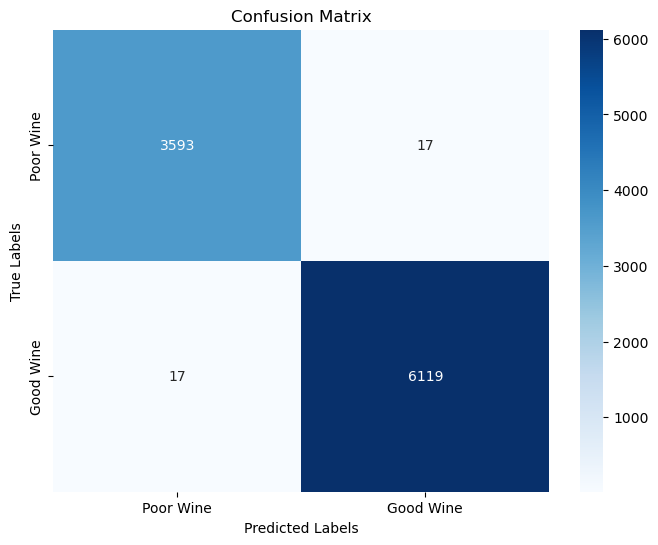

In [105]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Poor Wine', 'Good Wine'], 
            yticklabels=['Poor Wine', 'Good Wine'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

- **True Positives (TP):** 6119

    The model correctly predicted 6119 instances of "good quality" wine. These are cases where the wine was actually of good quality, and the model correctly identified it as such.

- **False Positives (FP):** 17

    The model incorrectly predicted 17 instances of "poor quality" wine as "good quality" wine. These are cases where the wine was not actually of good quality, but the model mistakenly classified it as such.

- **True Negatives (TN):** 3593
    
    The model correctly predicted 3593 instances of "poor quality" wine. These are cases where the wine was not of good quality, and the model correctly identified it as such.

- **False Negatives (FN):** 17
    
    The model incorrectly predicted 17 instances of "good quality" wine as "poor quality" wine. These are cases where the wine was actually of good quality, but the model failed to identify it correctly.

This confusion matrix still demonstrates a highly accurate model with very few misclassifications. It effectively identifies both "good quality" and "poor quality" wines, with only a small number of false positives and false negatives. Overall, the model appears to be reliable for classifying wine quality.

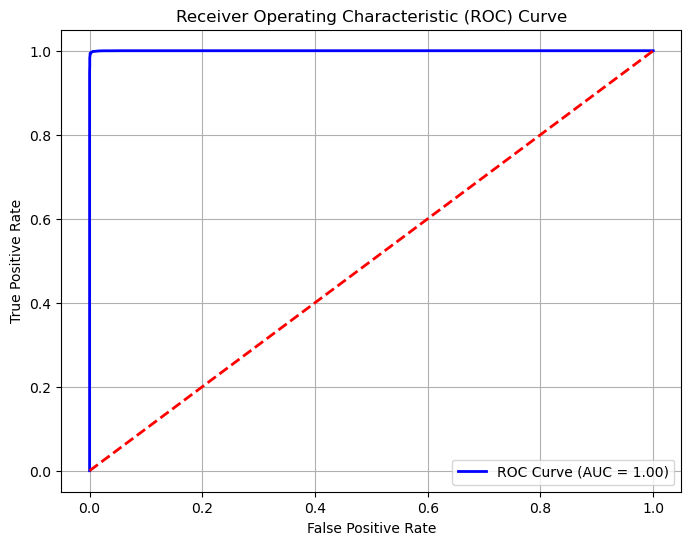

In [103]:
# Get predicted probabilities for the positive class
y_pred_proba = rf_grid_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- Given the high AUC score of 1.0, it suggests that the model has strong predictive power and is capable of making accurate classifications. This indicates that the model is likely well-calibrated and provides reliable predictions for the given task of classifying wine quality.

- Among all other models Random forest model has showed better performance with 100% F1 score over the Logistic Regression and XGBoost

- In summary, Random Forest achieved perfect performance, XGBoost performed slightly less accurately but still well, while Logistic Regression showed the lowest accuracy among the three classifiers. Depending on the F1 score , one might choose the Random Forest as best performing model.

## Saving the model

In [120]:
import joblib

# Train your model
final_model =rf_best_model
final_model.fit(X_train, y_train)

# Save the model to disk
joblib.dump(final_model, 'model.pkl')


['model.pkl']